In [1]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import re

import config_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_syntheic_load(true_values: any, predicted_values: any, test_data_path: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')
    filename = test_data_path.split('/')[-1].split('.')[0]

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.title(f'Syntheic Data Prediction ({filename})')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [4]:
def plot_syntheic_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [5]:
def plot_syntheic_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [6]:
def plot_syntheic_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [7]:
def plot_syntheic_load_list_by_mean_std_with_labels(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        
        plt.plot(sampled_time_points, sampled_mean_values_list[index], markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [8]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [9]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [10]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

In [11]:
def plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list: any, labels: List[str], sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

## Case1

In [12]:
case1_df = load_csv_data(config.case1_predict_results_path)
case1_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,NaN
1,2,0.531445,NaN,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,0.531763,NaN
2,3,0.562767,NaN,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,0.561650,NaN
3,4,0.593841,NaN,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,0.591538,NaN
4,5,0.624545,NaN,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,NaN


In [13]:
case1_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.001866,0.008096,0.001866,0.001866,0.001866,0.003115,0.004357,0.003115,0.006848,0.003115,NaN
39997,19997,NaN,NaN,0.002679,0.007660,0.007660,0.002679,0.005169,0.002302,0.005169,0.002302,0.002679,0.007284,NaN
39998,19998,NaN,NaN,0.001120,0.006101,0.001120,0.001371,0.006101,0.006101,0.006101,0.006101,0.006101,0.006101,NaN
39999,19999,NaN,NaN,0.004669,0.004669,0.004669,0.002803,0.004669,0.000313,0.004669,0.004669,0.000313,0.002803,NaN
40000,20000,NaN,NaN,0.006856,0.003106,0.008087,0.006856,0.003106,0.001875,0.003106,0.001875,0.001875,0.004366,NaN


In [14]:
# true values need to be shifted by 1
true_values = case1_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [15]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case1_predicted_values = case1_df[predicted_column][config.start:config.end+1]
case1_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,1.52303,1.52303,1.52801,1.52801,1.52303,1.52303,1.51805,1.52801,1.52303,1.52303
19901,1.55790,1.55541,1.56288,1.55790,1.56288,1.55790,1.55790,1.55790,1.55292,1.55292
19902,1.58530,1.58281,1.58281,1.58779,1.59277,1.58779,1.58281,1.58281,1.58281,1.58779
19903,1.61269,1.61269,1.61518,1.61269,1.62266,1.61767,1.61767,1.58779,1.60771,1.61767
19904,1.64258,1.64258,1.64756,1.64258,1.64756,1.64756,1.64756,1.62764,1.63760,1.64258
...,...,...,...,...,...,...,...,...,...,...
19996,1.40348,1.39850,1.39850,1.40348,1.40099,1.40846,1.40099,1.40846,1.40348,1.41344
19997,1.43835,1.44333,1.43835,1.43586,1.44333,1.44333,1.44333,1.44333,1.44333,1.44333
19998,1.47322,1.47322,1.47322,1.46575,1.47322,1.46824,1.47322,1.47322,1.46824,1.46575
19999,1.49314,1.50311,1.50809,1.49314,1.50311,1.49812,1.50311,1.49812,1.49812,1.49563


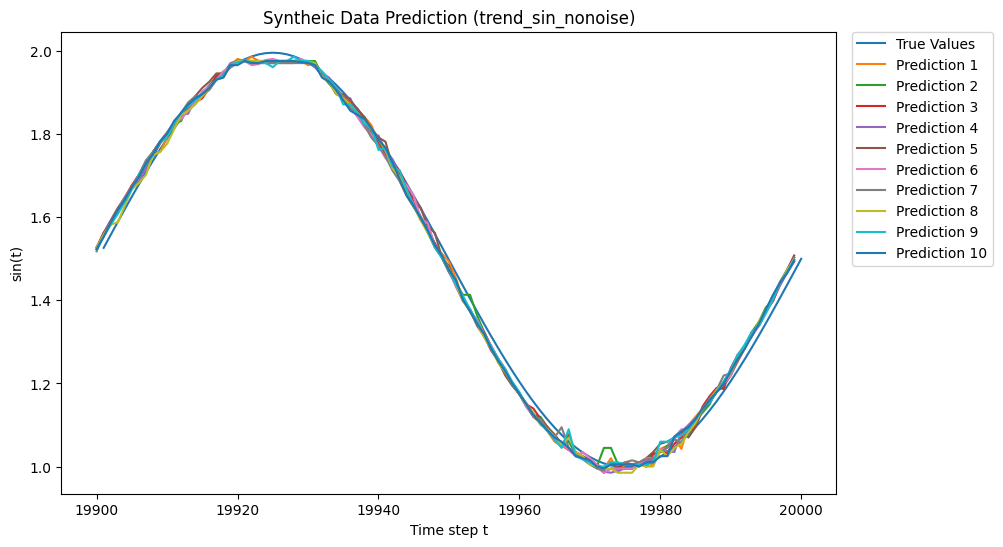

In [16]:
plot_syntheic_load(true_values, case1_predicted_values, config.test_data_path)

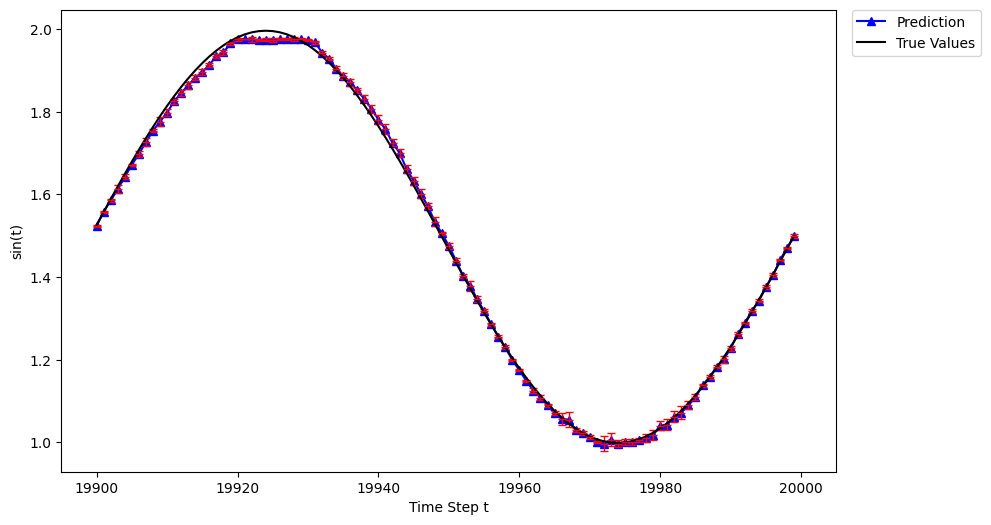

In [17]:
plot_syntheic_load_by_mean_std(true_values, case1_predicted_values, sampling_interval=config.sampling_interval)

In [18]:
# abs(outputdata[n][a] - inputdata[a+1])
case1_error_abs_value = case1_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case1_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.001856,0.001856,0.008106,0.001856,0.001856,0.000634,0.008106,0.003125,0.003125,0.006837
39901,0.003419,0.003419,0.001563,0.001563,0.003419,0.003419,0.008400,0.001563,0.003419,0.003419
39902,0.000130,0.002361,0.005111,0.000130,0.005111,0.000130,0.000130,0.000130,0.004851,0.004851
39903,0.003543,0.006034,0.006034,0.001053,0.003929,0.001053,0.006034,0.006034,0.006034,0.001053
39904,0.006846,0.006846,0.004356,0.006846,0.003116,0.001865,0.001865,0.031753,0.011827,0.001865
...,...,...,...,...,...,...,...,...,...,...
39996,0.001866,0.008096,0.001866,0.001866,0.001866,0.003115,0.004357,0.003115,0.006848,0.003115
39997,0.002679,0.007660,0.007660,0.002679,0.005169,0.002302,0.005169,0.002302,0.002679,0.007284
39998,0.001120,0.006101,0.001120,0.001371,0.006101,0.006101,0.006101,0.006101,0.006101,0.006101
39999,0.004669,0.004669,0.004669,0.002803,0.004669,0.000313,0.004669,0.004669,0.000313,0.002803


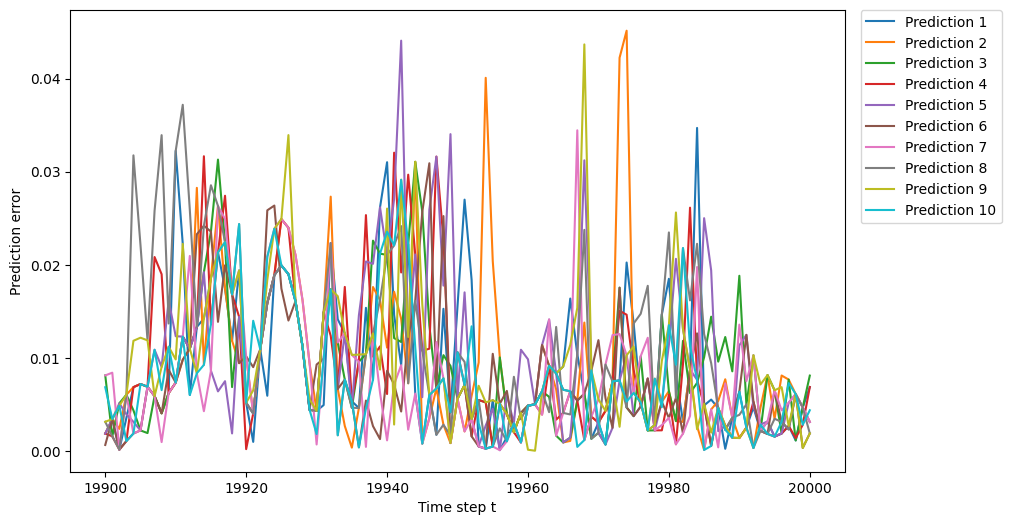

In [19]:
plot_prediction_absolute_error(case1_error_abs_value)

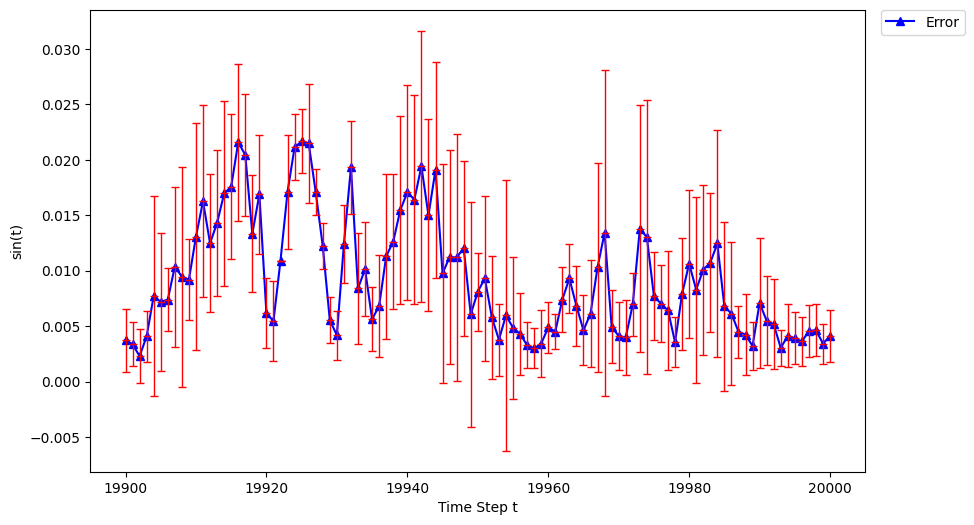

In [20]:
plot_prediction_absolute_error_by_mean_std(case1_error_abs_value, sampling_interval=config.sampling_interval)

## Case2

In [21]:
case2_df = load_csv_data(config.case2_predict_results_path)
case2_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,0.501875,NaN
1,2,0.531445,NaN,0.526781,0.526781,0.526781,0.526781,0.526781,0.526781,0.526781,0.526781,0.526781,0.526781,NaN
2,3,0.562767,NaN,0.551687,0.551687,0.551687,0.551687,0.551687,0.551687,0.551687,0.551687,0.551687,0.551687,NaN
3,4,0.593841,NaN,0.601500,0.601500,0.601500,0.601500,0.601500,0.601500,0.601500,0.601500,0.601500,0.601500,NaN
4,5,0.624545,NaN,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,0.626406,NaN


In [22]:
case2_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.001866,0.023040,0.023040,0.047946,0.023040,0.023040,0.023040,0.001866,0.001866,0.023040,NaN
39997,19997,NaN,NaN,0.017246,0.007660,0.017246,0.042153,0.042153,0.017246,0.007660,0.017246,0.007660,0.017246,NaN
39998,19998,NaN,NaN,0.011083,0.013824,0.011083,0.035989,0.011083,0.011083,0.038730,0.013824,0.011083,0.011083,NaN
39999,19999,NaN,NaN,0.004669,0.004669,0.004669,0.029575,0.029575,0.017122,0.004669,0.029575,0.017122,0.004669,NaN
40000,20000,NaN,NaN,0.026781,0.001875,0.026781,0.023031,0.023031,0.023031,0.026781,0.023031,0.001875,0.001875,NaN


In [23]:
# true values need to be shifted by 1
true_values = case2_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [24]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case2_predicted_values = case2_df[predicted_column][config.start:config.end+1]
case2_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,1.49812,1.54794,1.54794,1.49812,1.52303,1.54794,1.47322,1.53548,1.54794,1.54794
19901,1.52303,1.52303,1.57284,1.52303,1.53548,1.57284,1.47322,1.52303,1.54794,1.52303
19902,1.56039,1.57284,1.59775,1.58530,1.57284,1.59775,1.54794,1.57284,1.59775,1.57284
19903,1.58530,1.59775,1.62266,1.59775,1.59775,1.63511,1.56039,1.59775,1.62266,1.59775
19904,1.62266,1.62266,1.64756,1.64756,1.62266,1.67247,1.62266,1.62266,1.64756,1.57284
...,...,...,...,...,...,...,...,...,...,...
19996,1.42341,1.39850,1.42341,1.44831,1.44831,1.42341,1.39850,1.42341,1.39850,1.42341
19997,1.44831,1.42341,1.44831,1.47322,1.44831,1.44831,1.39850,1.42341,1.44831,1.44831
19998,1.47322,1.47322,1.47322,1.49812,1.49812,1.48567,1.47322,1.49812,1.48567,1.47322
19999,1.47322,1.49812,1.47322,1.52303,1.52303,1.52303,1.47322,1.52303,1.49812,1.49812


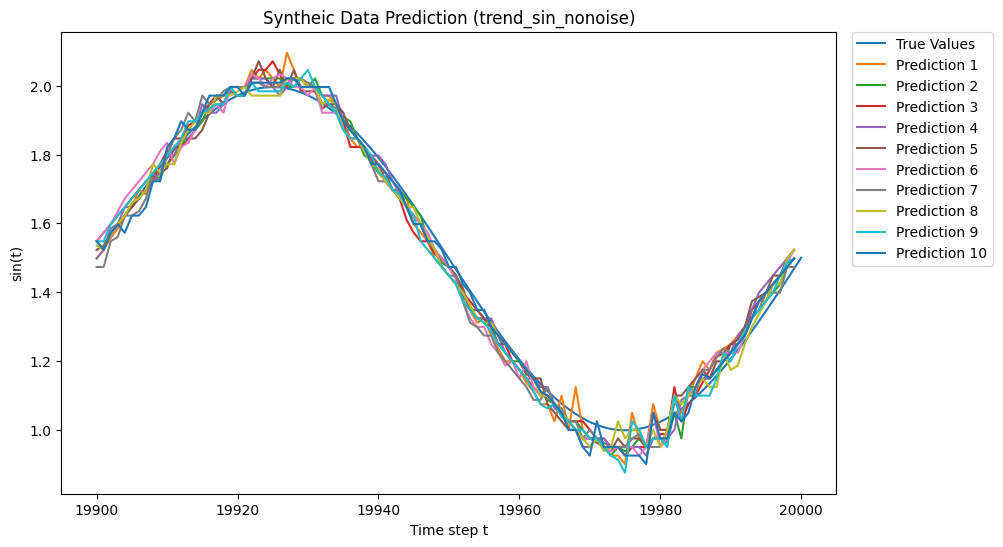

In [25]:
plot_syntheic_load(true_values, case2_predicted_values, config.test_data_path)

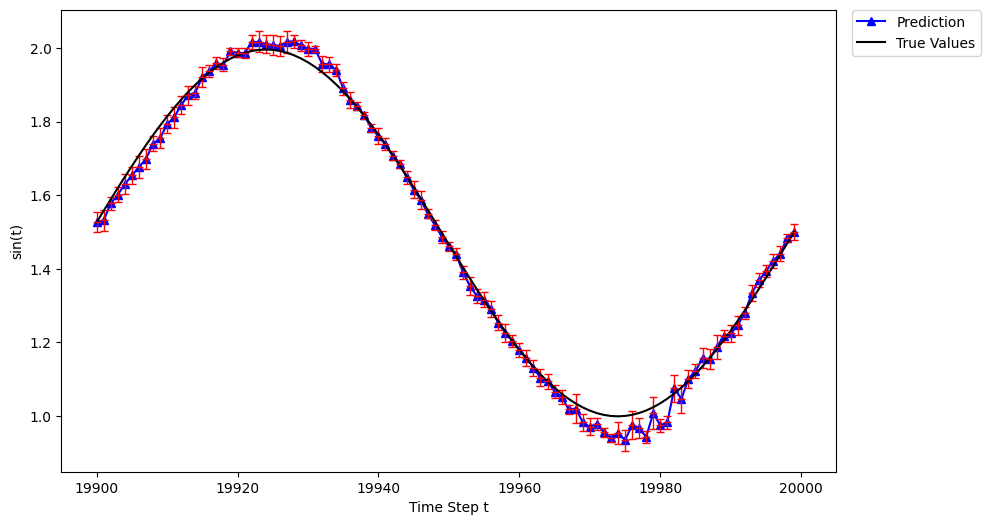

In [26]:
plot_syntheic_load_by_mean_std(true_values, case2_predicted_values, sampling_interval=config.sampling_interval)

In [27]:
# abs(outputdata[n][a] - inputdata[a+1])
case2_error_abs_value = case2_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case2_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.021781,0.040484,0.028031,0.021781,0.003125,0.028031,0.021781,0.028031,0.028031,0.003125
39901,0.028325,0.021487,0.021487,0.028325,0.003419,0.021487,0.053231,0.009034,0.021487,0.021487
39902,0.034739,0.034739,0.015074,0.034739,0.022286,0.015074,0.084551,0.034739,0.009832,0.034739
39903,0.028449,0.015996,0.008910,0.003543,0.015996,0.008910,0.040903,0.015996,0.008910,0.015996
39904,0.034243,0.021790,0.003116,0.021790,0.021790,0.015569,0.059149,0.021790,0.003116,0.021790
...,...,...,...,...,...,...,...,...,...,...
39996,0.001866,0.023040,0.023040,0.047946,0.023040,0.023040,0.023040,0.001866,0.001866,0.023040
39997,0.017246,0.007660,0.017246,0.042153,0.042153,0.017246,0.007660,0.017246,0.007660,0.017246
39998,0.011083,0.013824,0.011083,0.035989,0.011083,0.011083,0.038730,0.013824,0.011083,0.011083
39999,0.004669,0.004669,0.004669,0.029575,0.029575,0.017122,0.004669,0.029575,0.017122,0.004669


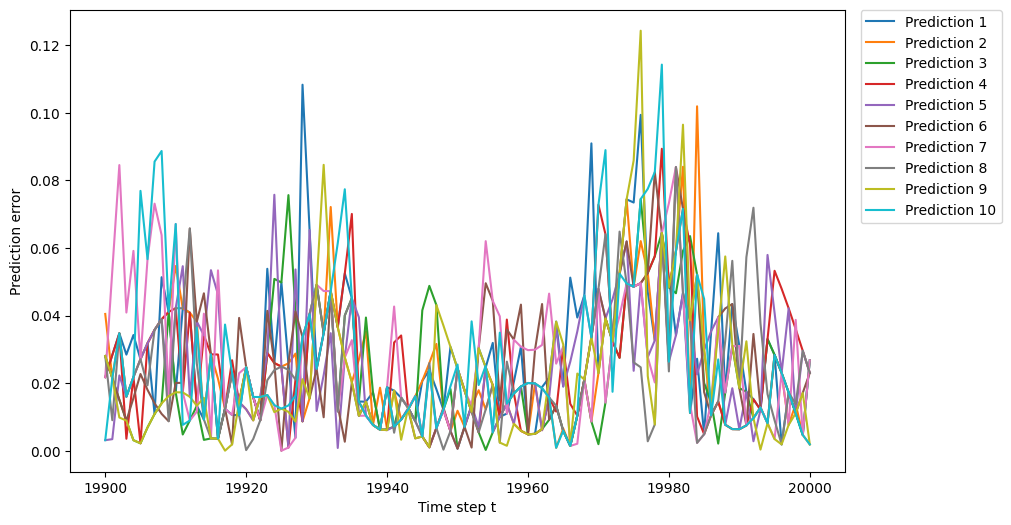

In [28]:
plot_prediction_absolute_error(case2_error_abs_value)

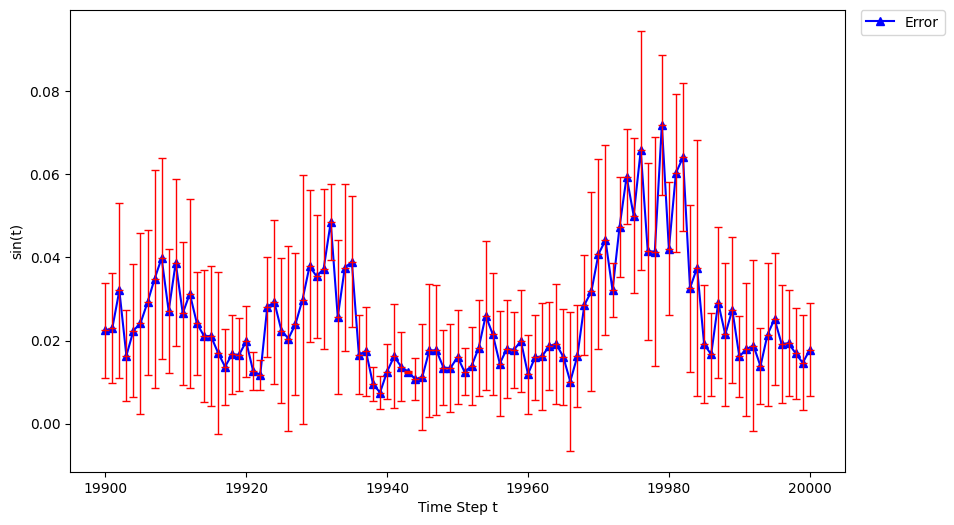

In [29]:
plot_prediction_absolute_error_by_mean_std(case2_error_abs_value, sampling_interval=config.sampling_interval)

## Case 3

In [30]:
case3_df = load_csv_data(config.case3_predict_results_path)
case3_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531445,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562767,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593841,NaN,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,NaN
4,5,0.624545,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [31]:
case3_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.38296,0.38921,0.38796,0.38546,0.38796,0.38546,0.38546,0.38546,0.38546,0.38796,NaN
39997,19997,NaN,NaN,0.41491,0.41616,0.41616,0.41616,0.41616,0.41616,0.41616,0.41616,0.41366,0.41616,NaN
39998,19998,NaN,NaN,0.44723,0.44973,0.44973,0.45598,0.44973,0.44973,0.44973,0.44723,0.45223,0.44973,NaN
39999,19999,NaN,NaN,0.48105,0.48105,0.48105,0.47855,0.48105,0.48105,0.48105,0.47855,0.48105,0.48105,NaN
40000,20000,NaN,NaN,0.51250,0.51000,0.51250,0.51250,0.51250,0.51250,0.51125,0.51000,0.51000,0.51250,NaN


In [32]:
# true values need to be shifted by 1
true_values = case3_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [33]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case3_predicted_values = case3_df[predicted_column][config.start:config.end+1]
case3_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,0.99250,0.9900,0.9875,0.98875,0.9900,0.9875,0.99500,0.9875,0.99000,0.99500
19901,0.99125,0.9875,0.9900,0.99000,0.9900,0.9875,0.99750,0.9875,0.99000,0.99500
19902,0.99125,0.9875,0.9900,0.99000,0.9900,0.9875,0.99000,0.9875,0.99125,0.99625
19903,0.99125,0.9850,0.9900,0.98500,0.9900,0.9875,0.99000,0.9875,0.99125,0.99000
19904,0.99125,0.9875,0.9900,0.99000,0.9900,0.9875,0.98750,0.9875,0.99000,0.98750
...,...,...,...,...,...,...,...,...,...,...
19996,0.99125,0.9900,0.9900,0.99000,0.9900,0.9900,0.99000,0.9900,0.99250,0.99000
19997,0.99000,0.9875,0.9875,0.98125,0.9875,0.9875,0.98750,0.9900,0.98500,0.98750
19998,0.98750,0.9875,0.9875,0.99000,0.9875,0.9875,0.98750,0.9900,0.98750,0.98750
19999,0.98750,0.9900,0.9875,0.98750,0.9875,0.9875,0.98875,0.9900,0.99000,0.98750


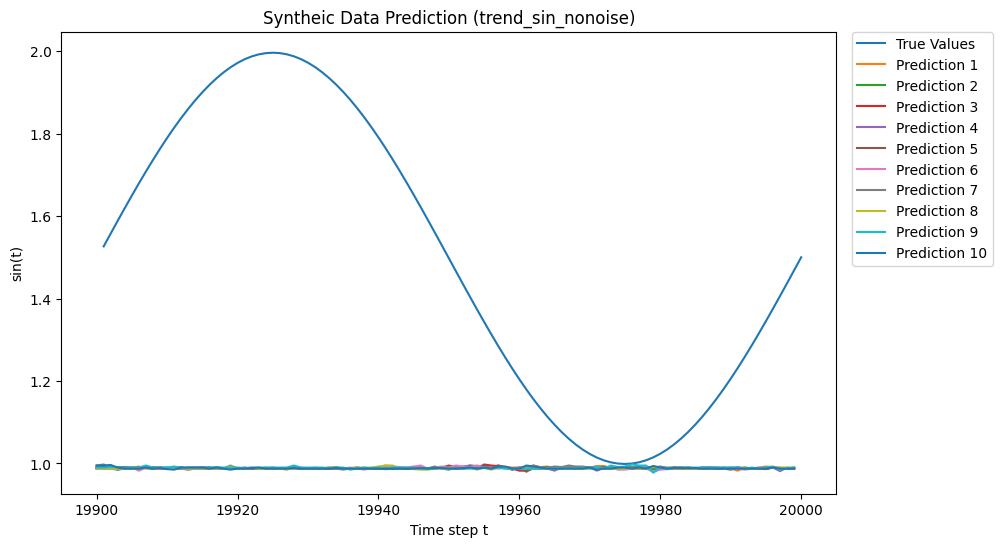

In [34]:
plot_syntheic_load(true_values, case3_predicted_values, config.test_data_path)

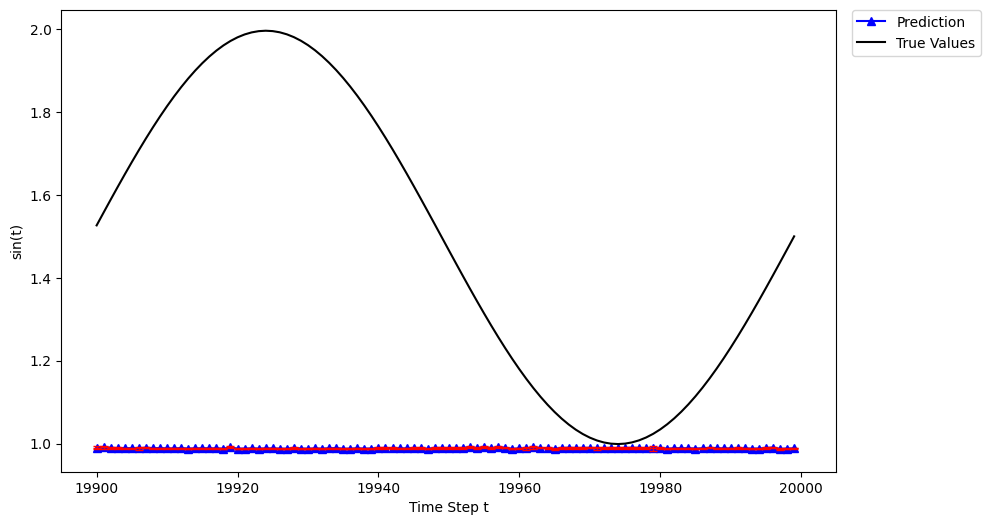

In [35]:
plot_syntheic_load_by_mean_std(true_values, case3_predicted_values, sampling_interval=config.sampling_interval)

In [36]:
# abs(outputdata[n][a] - inputdata[a+1])
case3_error_abs_value = case3_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case3_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.50500,0.50500,0.50500,0.50750,0.50500,0.50750,0.50000,0.50750,0.50500,0.50375
39901,0.53395,0.53645,0.53895,0.53770,0.53645,0.53895,0.53145,0.53895,0.53645,0.53145
39902,0.56652,0.57027,0.56777,0.56777,0.56777,0.57027,0.56027,0.57027,0.56777,0.56277
39903,0.59759,0.60134,0.59884,0.59884,0.59884,0.60134,0.59884,0.60134,0.59759,0.59259
39904,0.62829,0.63454,0.62954,0.63454,0.62954,0.63204,0.62954,0.63204,0.62829,0.62954
...,...,...,...,...,...,...,...,...,...,...
39996,0.38296,0.38921,0.38796,0.38546,0.38796,0.38546,0.38546,0.38546,0.38546,0.38796
39997,0.41491,0.41616,0.41616,0.41616,0.41616,0.41616,0.41616,0.41616,0.41366,0.41616
39998,0.44723,0.44973,0.44973,0.45598,0.44973,0.44973,0.44973,0.44723,0.45223,0.44973
39999,0.48105,0.48105,0.48105,0.47855,0.48105,0.48105,0.48105,0.47855,0.48105,0.48105


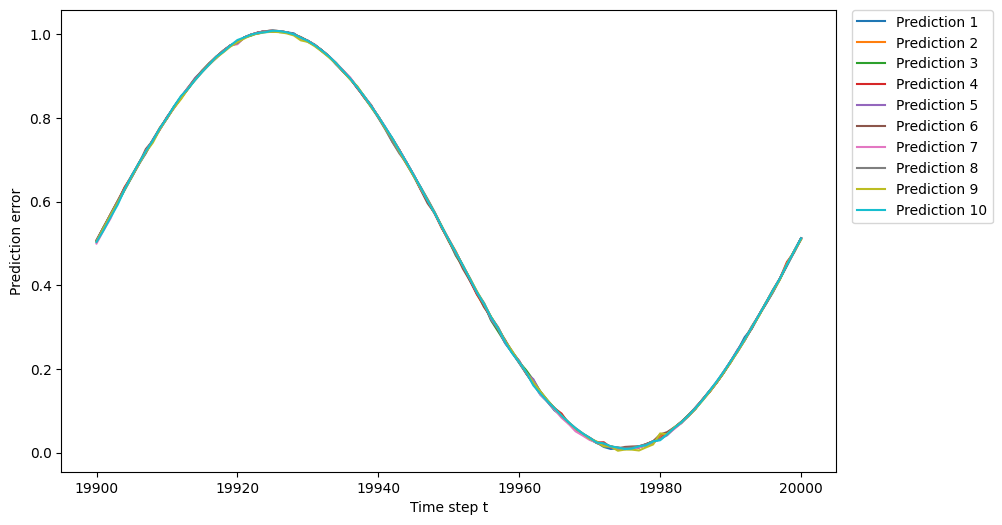

In [37]:
plot_prediction_absolute_error(case3_error_abs_value)

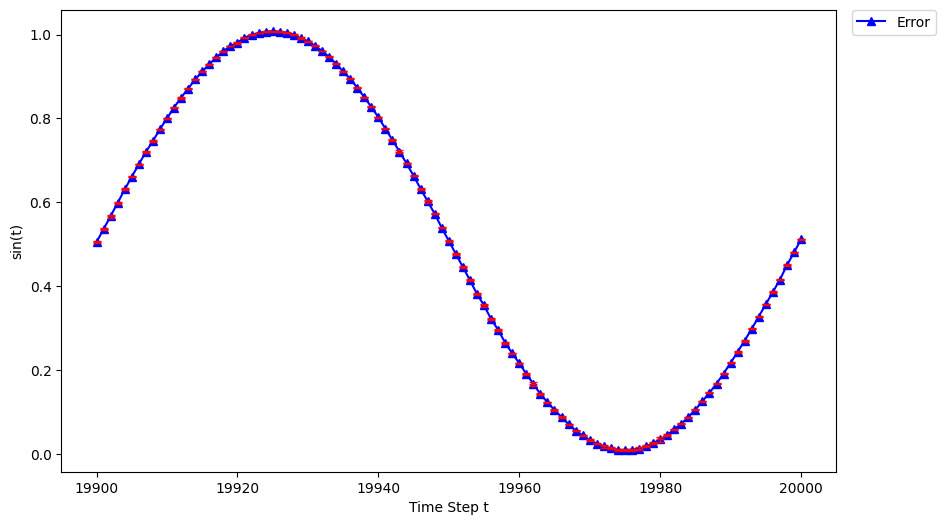

In [38]:
plot_prediction_absolute_error_by_mean_std(case3_error_abs_value, sampling_interval=config.sampling_interval)

## proposed(case4)

In [39]:
case4_df = load_csv_data(config.case4_predict_results_path)
case4_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531445,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562767,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593841,NaN,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,0.5950,NaN
4,5,0.624545,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [40]:
# true values need to be shifted by 1
true_values = case4_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [41]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case4_predicted_values = case4_df[predicted_column][config.start:config.end+1]
case4_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,1.5250,1.52500,1.48125,1.52500,1.52750,1.52500,1.5275,1.5250,1.5200,1.52500
19901,1.5575,1.55875,1.55750,1.55750,1.56000,1.55750,1.5575,1.5575,1.5425,1.55875
19902,1.5900,1.58750,1.58750,1.58875,1.59000,1.58750,1.5875,1.5900,1.5875,1.58750
19903,1.6200,1.57500,1.62000,1.62000,1.62000,1.62500,1.6225,1.6225,1.6175,1.62250
19904,1.6525,1.63750,1.65000,1.65000,1.64750,1.65500,1.6500,1.6525,1.6475,1.65000
...,...,...,...,...,...,...,...,...,...,...
19996,1.4050,1.40750,1.40750,1.40500,1.40750,1.40625,1.4075,1.4075,1.4050,1.40125
19997,1.4375,1.43500,1.43500,1.43250,1.43500,1.43375,1.4375,1.4375,1.4350,1.43500
19998,1.4675,1.46875,1.46750,1.46750,1.46750,1.46750,1.4725,1.4700,1.4650,1.47000
19999,1.5000,1.50000,1.49250,1.49750,1.49875,1.49750,1.5050,1.5000,1.4950,1.50250


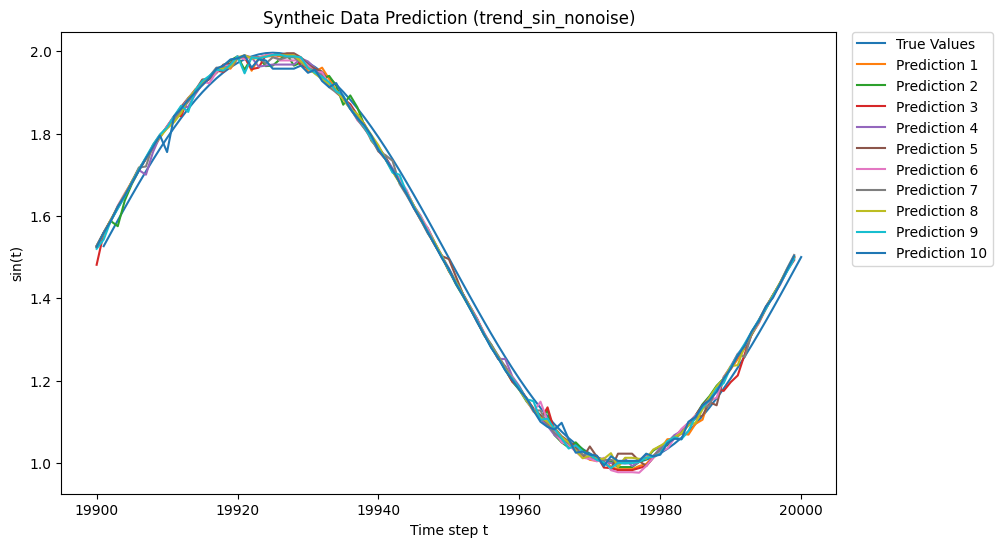

In [42]:
plot_syntheic_load(true_values, case4_predicted_values, config.test_data_path)

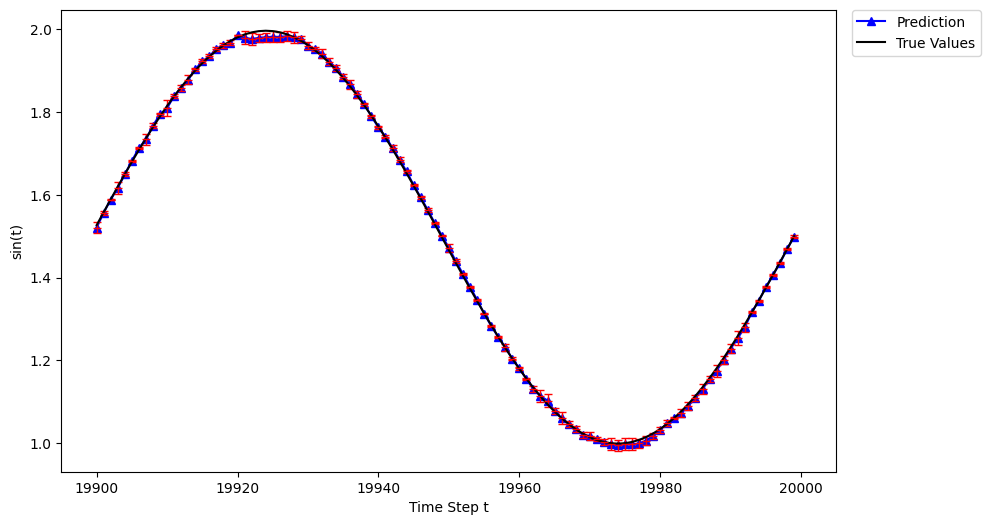

In [43]:
plot_syntheic_load_by_mean_std(true_values, case4_predicted_values, sampling_interval=config.sampling_interval)

In [44]:
# abs(outputdata[n][a] - inputdata[a+1])
case4_error_abs_value = case4_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case4_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,2.500000e-03,2.500000e-03,0.00500,0.00000,0.00250,0.00250,0.00000,5.000000e-03,0.00250,0.00250
39901,1.450000e-03,1.450000e-03,0.04520,0.00145,0.00105,0.00145,0.00105,1.450000e-03,0.00645,0.00145
39902,2.700000e-04,9.800000e-04,0.00027,0.00027,0.00223,0.00027,0.00027,2.700000e-04,0.01527,0.00098
39903,1.160000e-03,1.340000e-03,0.00134,0.00009,0.00116,0.00134,0.00134,1.160000e-03,0.00134,0.00134
39904,4.600000e-04,4.454000e-02,0.00046,0.00046,0.00046,0.00546,0.00296,2.960000e-03,0.00204,0.00296
...,...,...,...,...,...,...,...,...,...,...
39996,4.600000e-04,4.600000e-04,0.00204,0.00046,0.00454,0.00204,0.00204,2.040000e-03,0.00046,0.00454
39997,1.160000e-03,1.340000e-03,0.00134,0.00116,0.00134,0.00009,0.00134,1.340000e-03,0.00116,0.00491
39998,2.700000e-04,2.230000e-03,0.00223,0.00473,0.00223,0.00348,0.00027,2.700000e-04,0.00223,0.00223
39999,1.050000e-03,2.000000e-04,0.00105,0.00105,0.00105,0.00105,0.00395,1.450000e-03,0.00355,0.00145


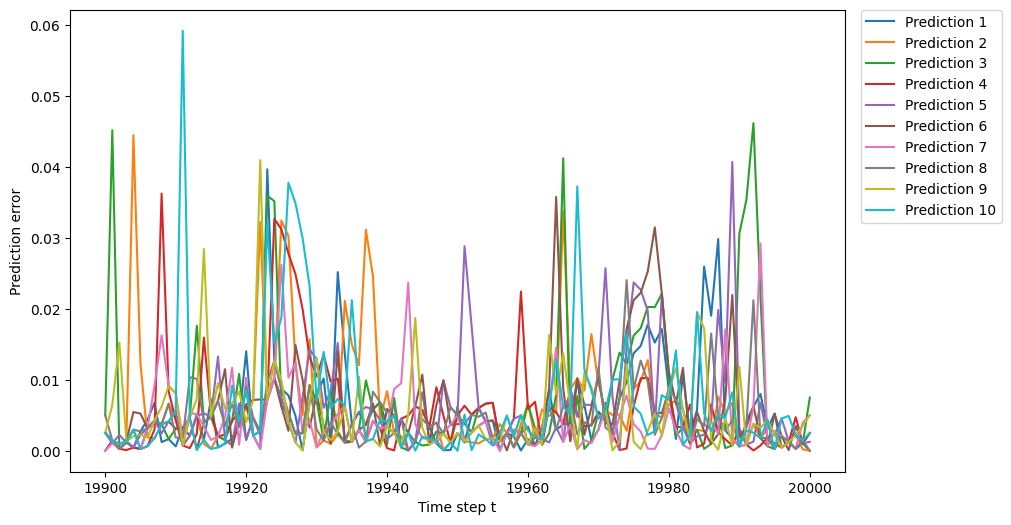

In [45]:
plot_prediction_absolute_error(case4_error_abs_value)

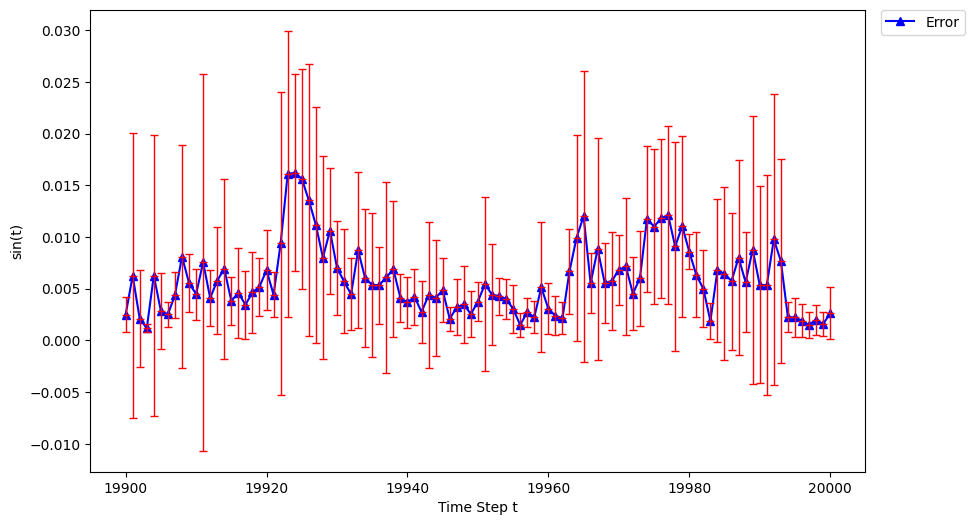

In [46]:
plot_prediction_absolute_error_by_mean_std(case4_error_abs_value, sampling_interval=config.sampling_interval)

# Summary

In [47]:
predicted_values_list = []
error_abs_value_list = []

# The following are the case labels you want to pass
labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
# labels = ['Case 1', 'Case 4']

# The following are the case labels you want to pass
predicted_values_list.append(case1_predicted_values)    # Add prediction values for Case 1
predicted_values_list.append(case2_predicted_values)    # Add prediction values for Case 2
predicted_values_list.append(case3_predicted_values)    # Add prediction values for Case 3
predicted_values_list.append(case4_predicted_values)    # Add prediction values for Case 4


error_abs_value_list.append(case1_error_abs_value)      # Add error values for Case 1
error_abs_value_list.append(case2_error_abs_value)      # Add error values for Case 2
error_abs_value_list.append(case3_error_abs_value)      # Add error values for Case 3
error_abs_value_list.append(case4_error_abs_value)      # Add error values for Case 4

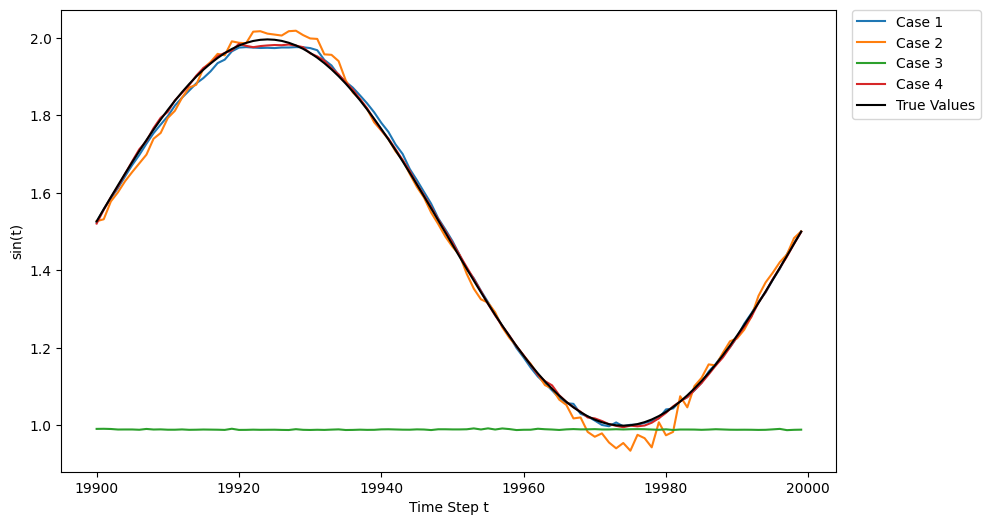

In [48]:
# plot_syntheic_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)
plot_syntheic_load_list_by_mean_std_with_labels(true_values, predicted_values_list, labels=labels, sampling_interval=config.sampling_interval)


In [49]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)
plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list, labels=labels ,sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)

ValueError: Image size of 141419x525 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 2 Axes>